In [1]:
from kinisi.diffusion_analyzer import DiffusionAnalyzer 
from pymatgen.io.vasp import Xdatcar
import scipp as sc

In [2]:
from kinisi.jump_diffusion_analyzer import JumpDiffusionAnalyzer
from pymatgen.io.vasp import Xdatcar
import scipp as sc

In [3]:
xd = Xdatcar('./example_XDATCAR.gz')

In [4]:
time_step1 = 2.0 * sc.Unit('fs')
step_skip1 = 50 * sc.Unit('dimensionless')

In [5]:

 xd.structures

[Structure Summary
 Lattice
     abc : 20.312311001202943 20.31233900091543 20.31242400034112
  angles : 90.00018617127729 90.00063748668664 89.99892811843388
  volume : 8380.714126120198
       A : 20.312311 0.00019 -0.000113
       B : 0.00019 20.312339 -3.3e-05
       C : -0.000113 -3.3e-05 20.312424
     pbc : True True True
 PeriodicSite: Li (0.2291, 2.917, 6.938) [0.01128, 0.1436, 0.3416]
 PeriodicSite: Li (0.923, 3.334, 16.22) [0.04544, 0.1642, 0.7984]
 PeriodicSite: Li (2.939, 13.17, 9.91) [0.1447, 0.6484, 0.4879]
 PeriodicSite: Li (1.083, 14.96, 17.46) [0.05332, 0.7363, 0.8597]
 PeriodicSite: Li (14.4, 0.4869, 7.404) [0.7091, 0.02396, 0.3645]
 PeriodicSite: Li (11.78, 3.99, 15.83) [0.58, 0.1964, 0.7796]
 PeriodicSite: Li (15.49, 11.63, 3.245) [0.7627, 0.5728, 0.1597]
 PeriodicSite: Li (15.17, 9.834, 17.46) [0.7469, 0.4841, 0.8598]
 PeriodicSite: Li (3.04, 4.701, 8.118) [0.1497, 0.2314, 0.3997]
 PeriodicSite: Li (3.785, 0.6306, 17.45) [0.1864, 0.03104, 0.8593]
 PeriodicSite: Li

In [6]:
p = DiffusionAnalyzer.from_Xdatcar(xd, time_step= time_step1, step_skip=step_skip1, specie='Li', dimension='xy')

Finding Means and Variances: 100%|██████████| 140/140 [00:00<00:00, 918.26it/s]


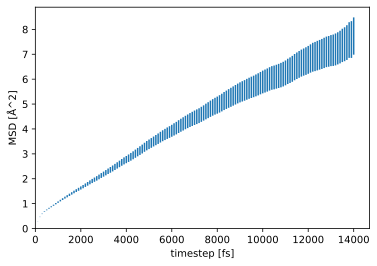

In [7]:
f = p.msd.plot(marker='')
f.canvas.ylabel = 'MSD ' + f.canvas.ylabel
f.canvas.xmin = 0
f.canvas.ymin = 0
f

In [8]:
z = JumpDiffusionAnalyzer.from_Xdatcar(xd, time_step= time_step1, step_skip=step_skip1, specie='Li', dimension='xy')

Finding Means and Variances: 100%|██████████| 140/140 [00:00<00:00, 2750.83it/s]


In [9]:
z.mstd

<scipp.DataArray>
Dimensions: Sizes[timestep:139, ]
Coordinates:
* dimensionality              int64  [dimensionless]  ()  2
* n_samples                 float64  [dimensionless]  (timestep)  [140, 70, ..., 1.01449, 1.00719]
* timestep                  float64             [fs]  (timestep)  [100, 200, ..., 13800, 13900]
Data:
                            float64           [Å^2]  (timestep)  [65.1173, 115.886, ..., 1427.92, 1466.31]  [29.1465, 166.533, ..., 305499, 12978.2]

In [10]:
z.n_atoms

<scipp.Variable> ()      int64  [dimensionless]  192

Text(29.222222222222214, 0.5, 'MSTD [Å^2]')

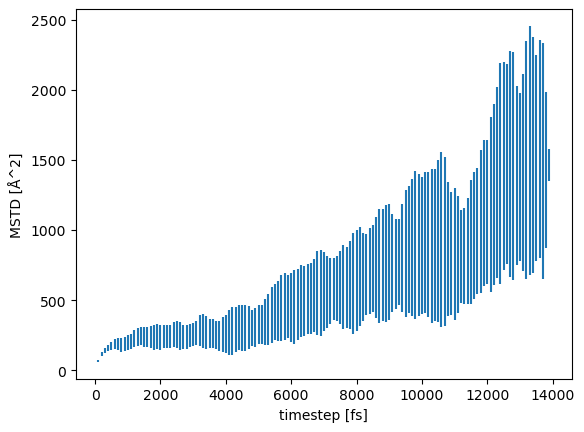

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
z.mstd.plot(marker='', ax=ax)
ax.set_ylabel('MSTD ' + ax.get_ylabel())
#ax.set_xlim(0, 7000)
#ax.set_ylim(0, 900)

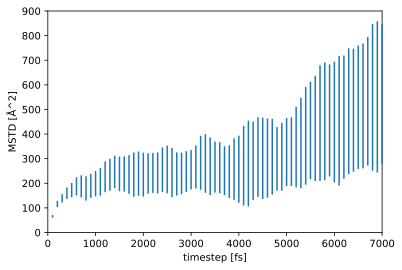

In [12]:
f = z.mstd.plot(marker='')
f.canvas.ylabel = 'MSTD ' + f.canvas.ylabel
f.canvas.xmin = 0
f.canvas.ymin = 0
f.canvas.ymax = 900
f.canvas.xmax = 7000
f

In [13]:
start_of_diffusion = 4000 * sc.Unit('fs')
z.jump_diffusion(start_of_diffusion)

LinregressResult(slope=0.12498697643589399, intercept=-322.83439804737657, rvalue=0.9618269070541763, pvalue=5.864826091052724e-57, stderr=0.0035922273926911794, intercept_stderr=33.781265145998084)


Likelihood Sampling: 100%|██████████| 1500/1500 [00:01<00:00, 946.96it/s] 


In [14]:
z.n_atoms

<scipp.Variable> ()      int64  [dimensionless]  192

In [15]:
z.mstd

<scipp.DataArray>
Dimensions: Sizes[timestep:139, ]
Coordinates:
* dimensionality              int64  [dimensionless]  ()  2
* n_samples                 float64  [dimensionless]  (timestep)  [140, 70, ..., 1.01449, 1.00719]
* timestep                  float64             [fs]  (timestep)  [100, 200, ..., 13800, 13900]
Data:
                            float64           [Å^2]  (timestep)  [65.1173, 115.886, ..., 1427.92, 1466.31]  [29.1465, 166.533, ..., 305499, 12978.2]

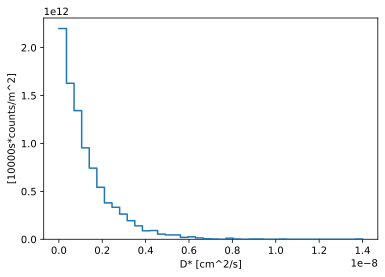

In [16]:
f = sc.counts_to_density(z.diff.D_J.hist(samples=40), dim='samples').plot()
f.canvas.xlabel = f'D* [{z.diff.D_J.unit}]'
f.canvas.ymin = 0
f

In [17]:
z.mstd.coords

<scipp.Dict>
  timestep: <scipp.Variable> (timestep: 139)    float64             [fs]  [100, 200, ..., 13800, 13900]
  n_samples: <scipp.Variable> (timestep: 139)    float64  [dimensionless]  [140, 70, ..., 1.01449, 1.00719]
  dimensionality: <scipp.Variable> ()      int64  [dimensionless]  2

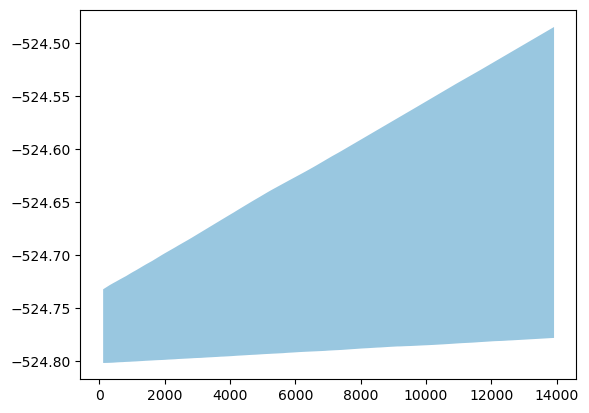

In [18]:
 import numpy as np

plt.fill_between(z.mstd.coords['timestep'].values,
                      *np.percentile(z.distributions, [16,84], axis=1),
                      alpha=0.4,
                      color='#0173B2',
                      lw=0)

In [19]:
z.mstd.coords['timestep'].shape

(139,)

In [20]:
z.diff.gradient.values

array([1.57622814e-05, 9.66460735e-07, 4.14830940e-06, ...,
       4.22632101e-06, 1.11163186e-05, 5.40779657e-06])

In [21]:
z.diff.gradient.values

array([1.57622814e-05, 9.66460735e-07, 4.14830940e-06, ...,
       4.22632101e-06, 1.11163186e-05, 5.40779657e-06])

In [22]:
 z.diff.intercept.values

array([-524.74281992, -524.8152861 , -524.78053704, ..., -524.79521163,
       -524.76333616, -524.78953987])

In [23]:
z.mstd.coords

<scipp.Dict>
  timestep: <scipp.Variable> (timestep: 139)    float64             [fs]  [100, 200, ..., 13800, 13900]
  n_samples: <scipp.Variable> (timestep: 139)    float64  [dimensionless]  [140, 70, ..., 1.01449, 1.00719]
  dimensionality: <scipp.Variable> ()      int64  [dimensionless]  2

In [24]:
p.msd.coords

<scipp.Dict>
  timestep: <scipp.Variable> (timestep: 140)    float64             [fs]  [100, 200, ..., 13900, 14000]
  n_samples: <scipp.Variable> (timestep: 140)    float64  [dimensionless]  [26880, 13440, ..., 193.381, 192]
  dimensionality: <scipp.Variable> ()      int64  [dimensionless]  2

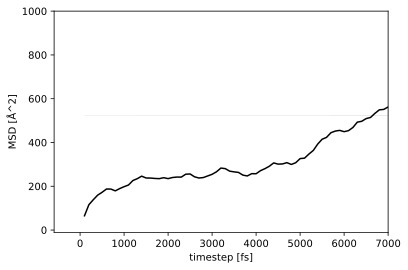

In [25]:
import numpy as np

#distributions = z.diff.gradient.values * z.mstd.coords['timestep'].values[:, np.newaxis] + z.diff.intercept.values

credible_intervals = [[16, 84], [2.5, 97.5], [0.15, 99.85]]
alpha = [0.6, 0.4, 0.2]

f = z.mstd.plot(marker='', ls='-', errorbars=False, color='k')
for i, ci in enumerate(credible_intervals):     
    f.ax.fill_between(z.mstd.coords['timestep'].values,
                      *np.percentile(-z.distributions, ci, axis=1),
                      alpha=alpha[i],
                      color='#0173B2',
                      lw=0)
f.canvas.ylabel = 'MSD ' + f.canvas.ylabel


f.canvas.xmax = 7000
f.canvas.ymax = 1000

f

In [26]:
z.distributions

array([[-524.74124369, -524.81518946, -524.7801222 , ..., -524.794789  ,
        -524.76222452, -524.78899909],
       [-524.73966746, -524.81509281, -524.77970737, ..., -524.79436637,
        -524.76111289, -524.78845831],
       [-524.73809123, -524.81499616, -524.77929254, ..., -524.79394373,
        -524.76000126, -524.78791753],
       ...,
       [-524.52687666, -524.80204559, -524.7237052 , ..., -524.73731103,
        -524.61104259, -524.71545306],
       [-524.52530043, -524.80194894, -524.72329037, ..., -524.7368884 ,
        -524.60993096, -524.71491228],
       [-524.5237242 , -524.8018523 , -524.72287553, ..., -524.73646577,
        -524.60881933, -524.7143715 ]])

In [27]:
z.mstd.coords['timestep'][0]

<scipp.Variable> ()    float64             [fs]  100

In [28]:
z.mstd.coords['n_samples'][0]

<scipp.Variable> ()    float64  [dimensionless]  140

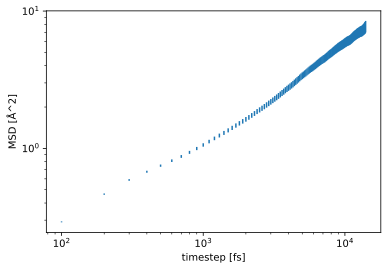

In [29]:
f = p.msd.plot(marker='', norm='log', scale={'timestep': 'log'})
f.canvas.ylabel = 'MSD ' + f.canvas.ylabel
f

In [30]:
p.msd.coords['n_samples']

<scipp.Variable> (timestep: 140)    float64  [dimensionless]  [26880, 13440, ..., 193.381, 192]

In [31]:
start_of_diffusion = 3000 * sc.Unit('fs')
p.diffusion(start_of_diffusion)

LinregressResult(slope=0.00048628126918804775, intercept=0.9516941078683825, rvalue=0.9978069674717333, pvalue=2.240219216747027e-130, stderr=3.0897764505983525e-06, intercept_stderr=0.028067122927647875)


Likelihood Sampling: 100%|██████████| 1500/1500 [00:01<00:00, 1093.84it/s]


In [32]:
p.diff.D

<scipp.Variable> (samples: 3200)    float64         [cm^2/s]  [1.22099e-05, 1.18368e-05, ..., 1.03001e-05, 1.36909e-05]

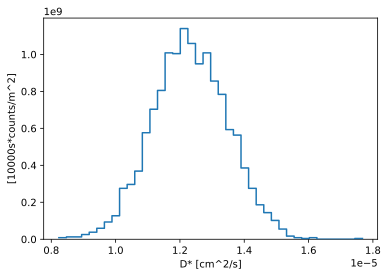

In [33]:
f = sc.counts_to_density(p.diff.D.hist(samples=40), dim='samples').plot()
f.canvas.xlabel = f'D* [{p.diff.D.unit}]'
f.canvas.ymin = 0
f

In [34]:
import numpy as np

In [35]:
distributions = p.diff.gradient.values * p.msd.coords['timestep'].values[:, np.newaxis] + p.diff.intercept.values

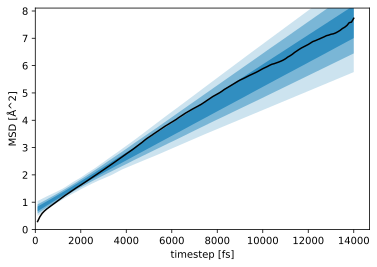

In [36]:
credible_intervals = [[16, 84], [2.5, 97.5], [0.15, 99.85]]
alpha = [0.6, 0.4, 0.2]

f = p.msd.plot(marker='', ls='-', errorbars=False, color='k')
for i, ci in enumerate(credible_intervals):     
    f.ax.fill_between(p.msd.coords['timestep'].values,
                      *np.percentile(distributions, ci, axis=1),
                      alpha=alpha[i],
                      color='#0173B2',
                      lw=0)
f.canvas.ylabel = 'MSD ' + f.canvas.ylabel
f.canvas.xmin = 0
f.canvas.ymin = 0
f